# SUPERFICIE Con MLPClassifier

In [1]:
import numpy as np
# Definir la función objetivo
def target_function(x1, x2):
    y = - 2 * (x1)**2 - 2 * (x2)**2 + 2 * x1 + 2 * x2
    return y

# Teórico

## PDP

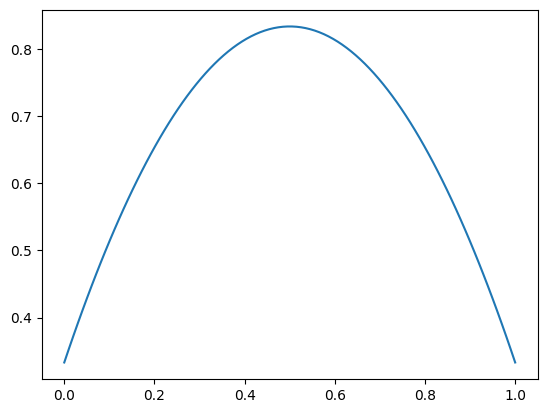

In [2]:
import numpy as np
import matplotlib.pyplot as plt


xs = np.linspace(0, 1, 100)
ys = -2*xs**2 + 2*xs + 1/3

plt.plot(xs, ys)
plt.show()

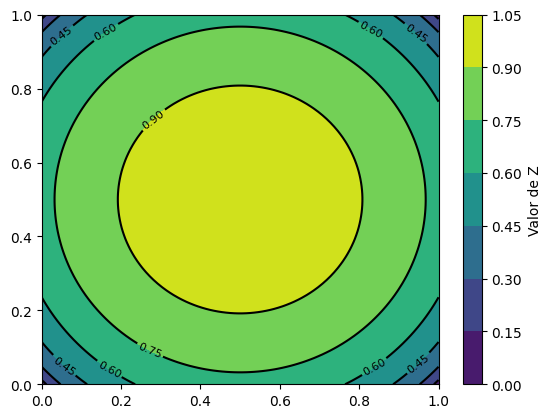

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = np.sqrt(-2*X ** 2 - 2*Y ** 2 + 2*X + 2*Y)

# Figura y ejes
fig, ax = plt.subplots()

# Contornos llenos
contour_filled = ax.contourf(X, Y, Z, cmap='viridis')

# Contornos con etiquetas
contour_lines = ax.contour(X, Y, Z, colors='black')
ax.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.2f')

# Barra de colores
cbar = fig.colorbar(contour_filled)
cbar.ax.set_ylabel('Valor de Z')

# Mostrar la gráfica
plt.show()

## ALE

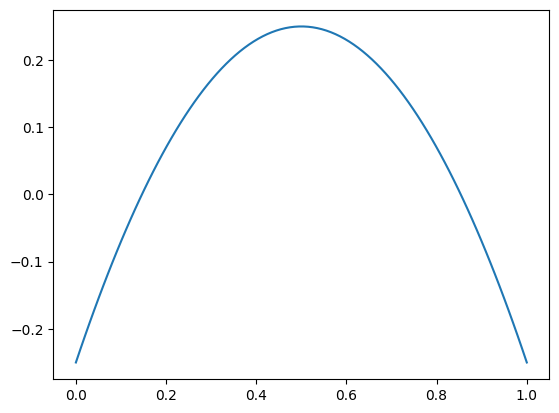

In [4]:
import numpy as np
import matplotlib.pyplot as plt


xs = np.linspace(0, 1, 100)
ys = -2*xs**2 + 2*xs - 1/4

plt.plot(xs, ys)
plt.show()

# Práctico con desviación típica 0

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sys
sys.path.append('../')
import Modelos

# Cargar los datos
nombre_archivo = "superficie_0.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros a optimizar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50,100), (50, 50, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.1]
}

# Inicializar el clasificador MLP
mlp = MLPClassifier(random_state=42, max_iter=1000)

mlp = Modelos.optimizar_modelo_clasificacion("NeuralNetwork", mlp, param_grid, X_train, y_train, X_test, y_test)


NeuralNetwork:
Fitting 5 folds for each of 192 candidates, totalling 960 fits


Mejores hiperparámetros encontrados:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'sgd'}

Precisión del modelo en el conjunto de test: 0.995
Reporte de clasificación en el conjunto de test:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       196
           1       1.00      1.00      1.00       804

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      1.00      1000



In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sys
sys.path.append('../')
import Modelos

# Cargar los datos
nombre_archivo = "superficie_0.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_clf = MLPClassifier(activation='relu',
        alpha=0.01,
        hidden_layer_sizes=(50,50,50),
        learning_rate='adaptive',
        learning_rate_init=0.01,
        solver='sgd',
        max_iter=1000)
mlp_clf.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 50, 50),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000,
              solver='sgd')

In [107]:
import pickle

pickle.dump(mlp_clf, open('nt_superficie_0', 'wb'))

In [33]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar los datos
nombre_archivo = "superficie_0.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mlp_clf = pickle.load(open('nt_superficie_0', 'rb'))

## Real

### PDP

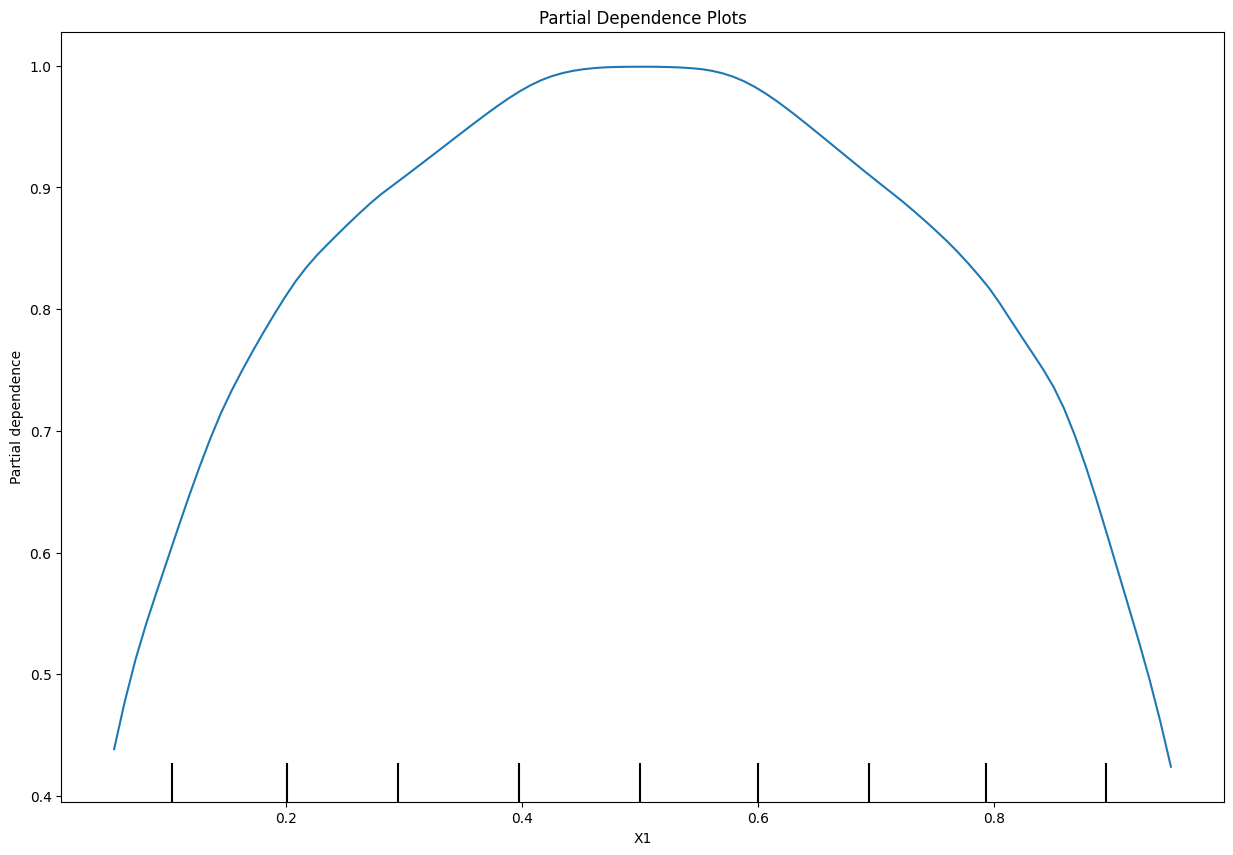

In [7]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[0], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

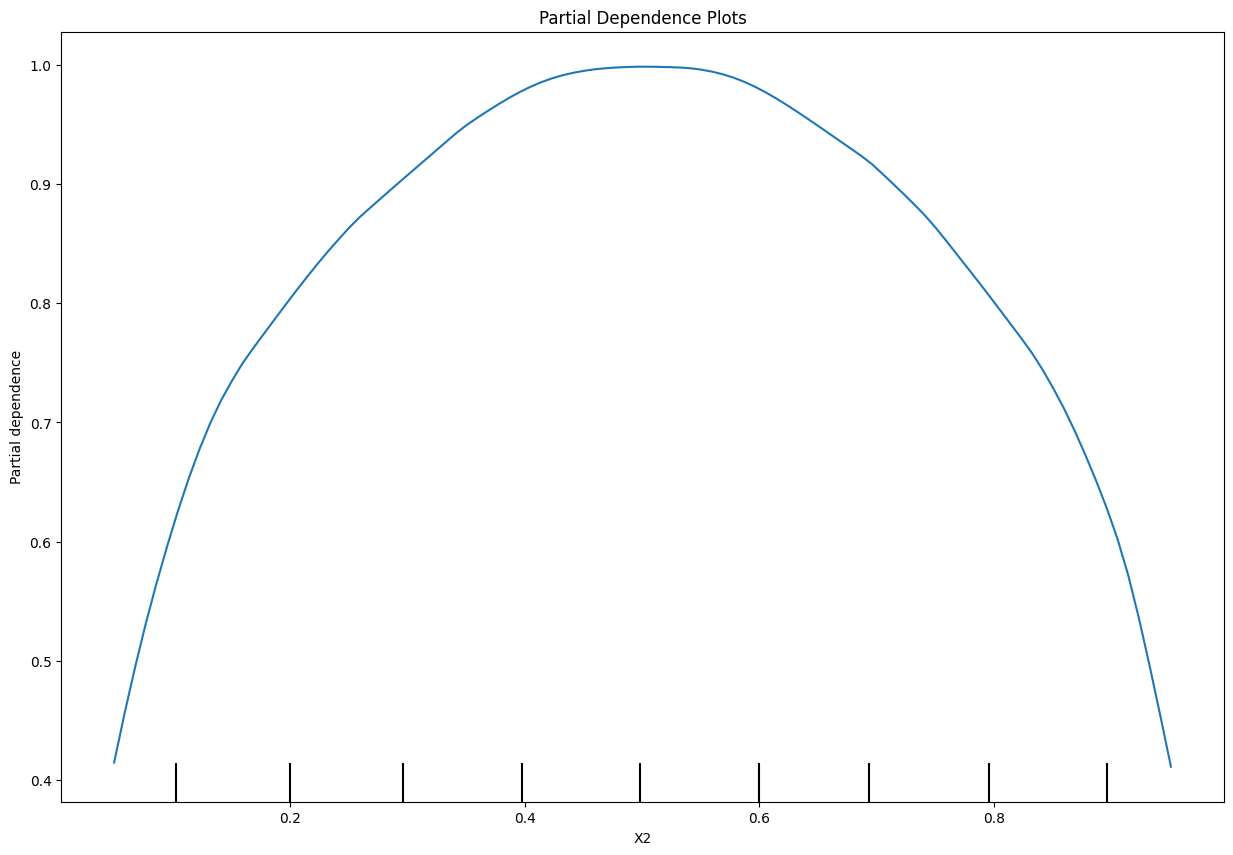

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[1], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

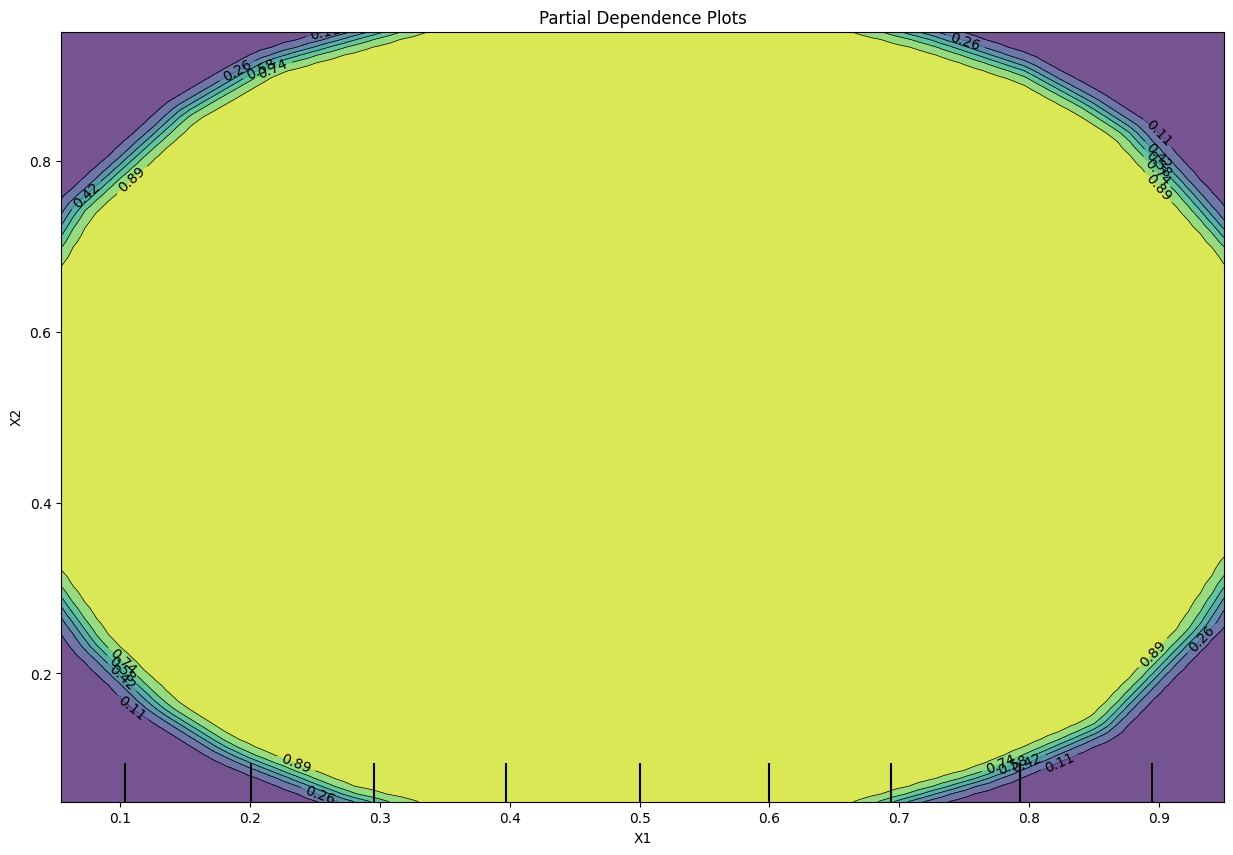

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[(0,1)], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

### ALE

In [13]:
#pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

In [14]:
from alepython import ale_plot
feature_list=['X1','X2']

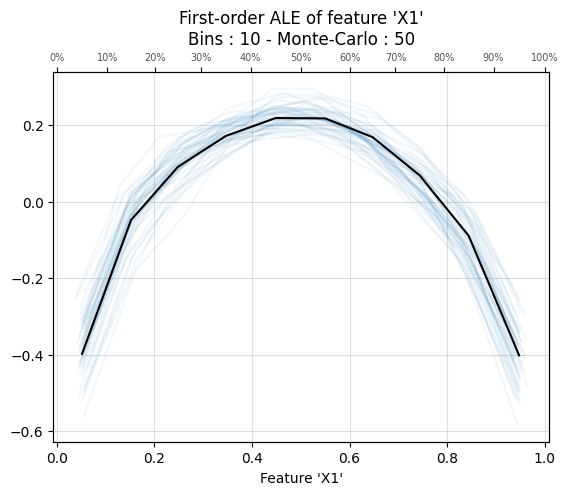

<Axes: title={'center': "First-order ALE of feature 'X1'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X1'">

In [15]:
ale_plot(mlp_clf, X, 'X1', monte_carlo=True)

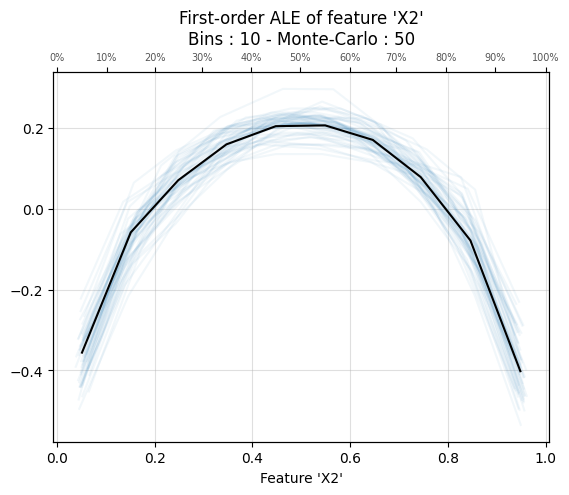

<Axes: title={'center': "First-order ALE of feature 'X2'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X2'">

In [16]:
ale_plot(mlp_clf, X, 'X2', monte_carlo=True)

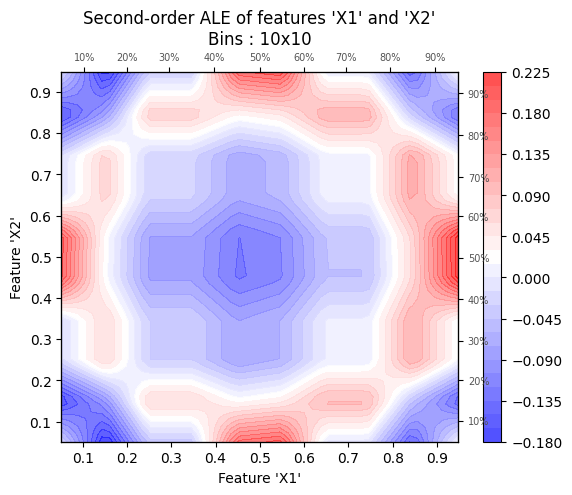

<Axes: title={'center': "Second-order ALE of features 'X1' and 'X2'\nBins : 10x10"}, xlabel="Feature 'X1'", ylabel="Feature 'X2'">

In [17]:
ale_plot(mlp_clf, X, ['X1','X2'], monte_carlo=True)

## COMPARACIÓN

MSE for PDP: 0.03177758785243176


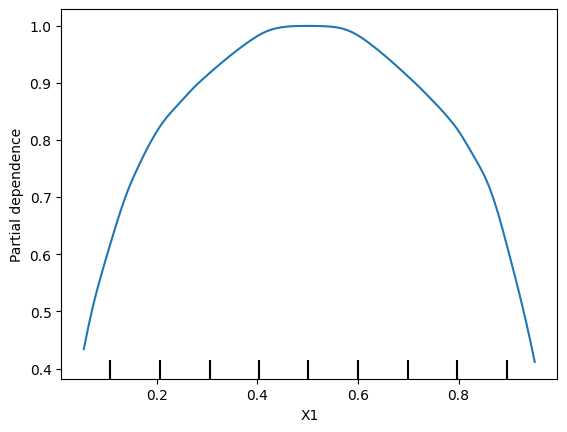

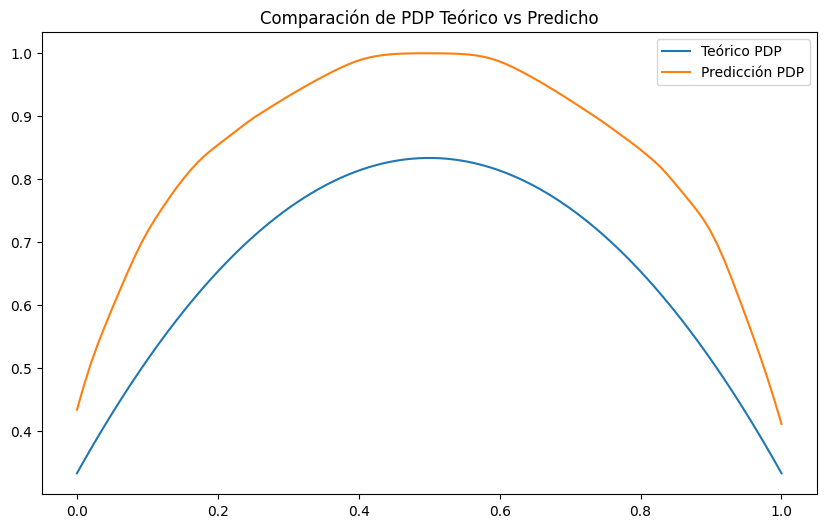

In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Función teórica para PDP y ALE
def theoretical_pdp_ale(xs, kind='pdp'):
    if kind == 'pdp':
        ys = -2*xs**2 + 2*xs + 1/3
    elif kind == 'ale':
        ys = -2*xs**2 + 2*xs - 1/4
    return ys

# Calcular los valores teóricos
xs = np.linspace(0, 1, 100)
pdp_theoretical = theoretical_pdp_ale(xs, kind='pdp')
ale_theoretical = theoretical_pdp_ale(xs, kind='ale')

# Calcular los valores predichos por el modelo para PDP
pdp_display = PartialDependenceDisplay.from_estimator(mlp_clf, X, [0], grid_resolution=100)
pdp_predicted = pdp_display.lines_[0][0].get_ydata()

# Calcular MSE para PDP
mse_pdp = mean_squared_error(pdp_theoretical, pdp_predicted)
print(f'MSE for PDP: {mse_pdp}')

# Visualizar y comparar gráficas

# PDP
plt.figure(figsize=(10, 6))
plt.plot(xs, pdp_theoretical, label='Teórico PDP')
plt.plot(xs, pdp_predicted, label='Predicción PDP')
plt.legend()
plt.title('Comparación de PDP Teórico vs Predicho')
plt.show()

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names


MSE for ALE: 0.045871474884453894


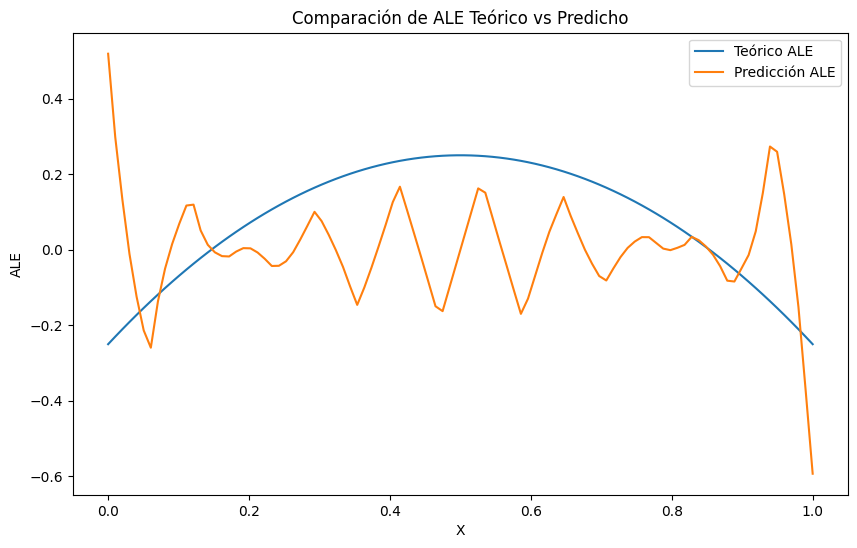

In [56]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from alibi.explainers import ALE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Cargar los datos
nombre_archivo = "superficie_0.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el modelo
mlp_clf = pickle.load(open('nt_superficie_0', 'rb'))

# Envolver el método predict_proba en una función para adaptarlo a Alibi
def predict_proba_func(X):
    return mlp_clf.predict_proba(X)

# Calcular ALE usando alibi
ale_explainer = ALE(predict_proba_func, feature_names=X.columns.tolist(), target_names=["class 0", "class 1"])
ale_exp = ale_explainer.explain(X_train.values)

# Extraer valores ALE para la primera característica y aplanar si es necesario
ale_values = ale_exp.ale_values[0].flatten()

# Calcular los valores teóricos de ALE
xs = np.linspace(0, 1, 100)
ale_theoretical = -2 * xs**2 + 2 * xs - 1/4  # Esto es un ejemplo, asegúrate de usar la función correcta

# Interpolar ALE predicho para coincidir con los valores teóricos
ale_predicted = np.interp(xs, np.linspace(0, 1, len(ale_values)), ale_values)

# Calcular MSE para ALE
mse_ale = mean_squared_error(ale_theoretical, ale_predicted)
print(f'MSE for ALE: {mse_ale}')

# Visualizar y comparar gráficas
plt.figure(figsize=(10, 6))
plt.plot(xs, ale_theoretical, label='Teórico ALE')
plt.plot(xs, ale_predicted, label='Predicción ALE')
plt.legend()
plt.title('Comparación de ALE Teórico vs Predicho')
plt.xlabel('X')
plt.ylabel('ALE')
plt.show()

# Práctico con desviación típica 0,1

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sys
sys.path.append('../')
import Modelos

# Cargar los datos
nombre_archivo = "superficie_1.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros a optimizar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50,100), (50, 50, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.1]
}

# Inicializar el clasificador MLP
#mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp = MLPClassifier(random_state=42, max_iter=1000, activation='relu',alpha=0.001, hidden_layer_sizes=(50,50), learning_rate='constant', learning_rate_init=0.01, solver='sgd')
#mlp = Modelos.optimizar_modelo_clasificacion("NeuralNetwork", mlp, param_grid, X_train, y_train, X_test, y_test)
mlp.fit(X_train,y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate_init=0.01,
              max_iter=1000, random_state=42, solver='sgd')

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sys
sys.path.append('../')
import Modelos

# Cargar los datos
nombre_archivo = "superficie_1.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_clf = MLPClassifier(activation='relu',
        alpha=0.01,
        hidden_layer_sizes=(50,50,50),
        learning_rate='adaptive',
        learning_rate_init=0.01,
        solver='sgd',
        max_iter=1000)
mlp_clf.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 50, 50),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000,
              solver='sgd')

In [7]:
import pickle

pickle.dump(mlp, open('nt_superficie_1', 'wb'))

In [13]:
import pickle
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar los datos
nombre_archivo = "superficie_1.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mlp_clf = pickle.load(open('nt_superficie_1', 'rb'))

In [15]:
from sklearn.metrics import classification_report

y_pred = mlp_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       259
           1       0.90      0.94      0.92       741

    accuracy                           0.88      1000
   macro avg       0.85      0.82      0.83      1000
weighted avg       0.87      0.88      0.87      1000



## Real

### PDP

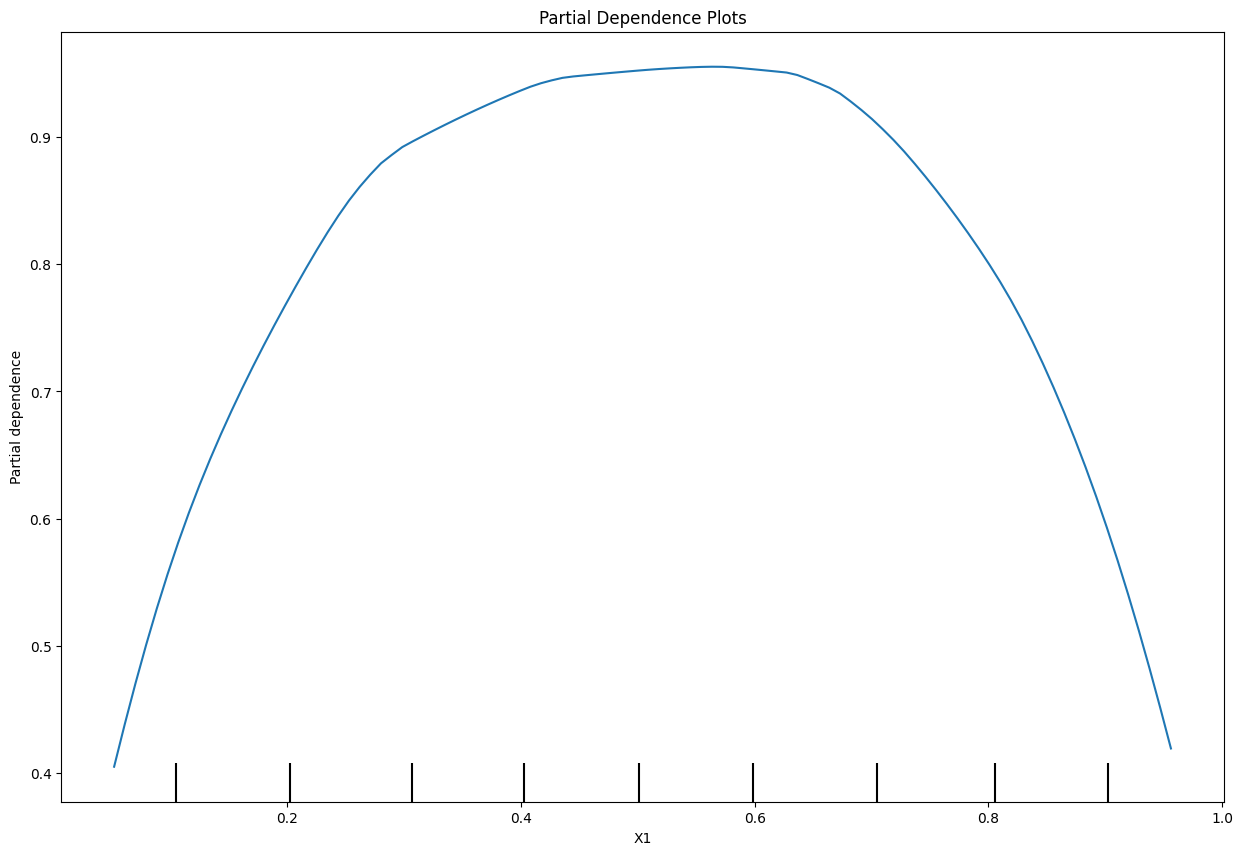

In [39]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[0], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error

true_values = []
predicted_values = []
for i in range(X.shape[0]):
    true_values.append(target_function(X.iloc[[i]]['X1'], X.iloc[[i]]['X2']))
    predicted_values.append(mlp_clf.predict_proba(X.iloc[[3]])[0][1])

mae = mean_absolute_error(true_values, predicted_values)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.3327332031126138


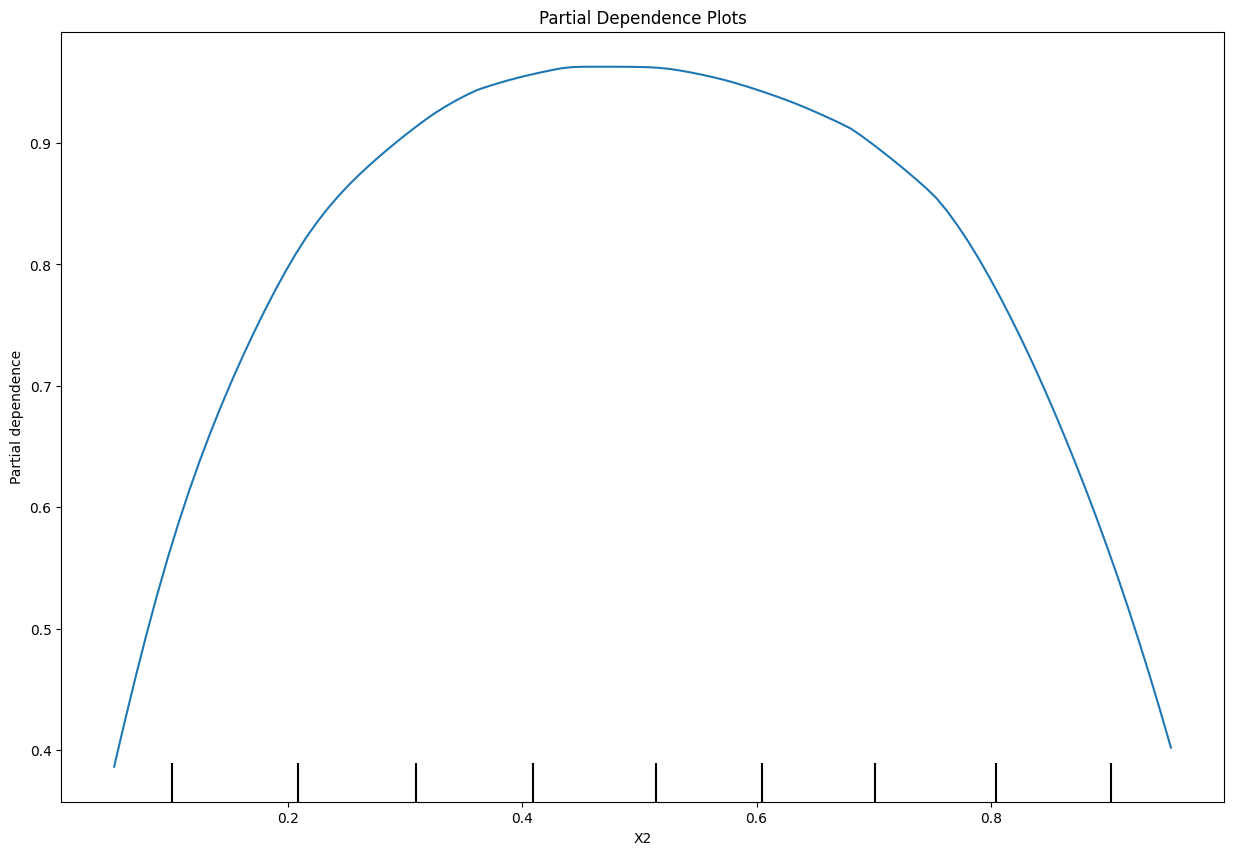

In [41]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[1], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

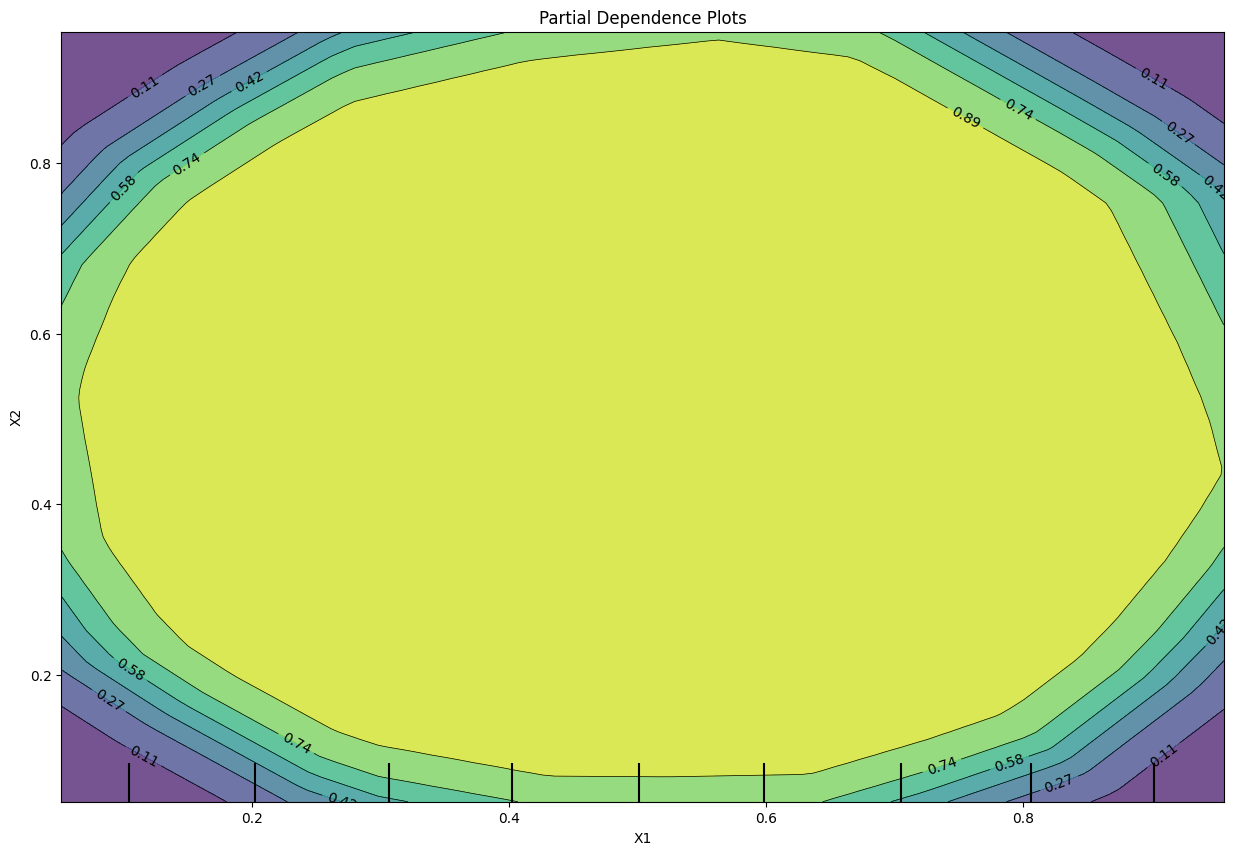

In [42]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[(0,1)], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

## COMPARACIÓN

MSE for PDP: 0.022401305872744918


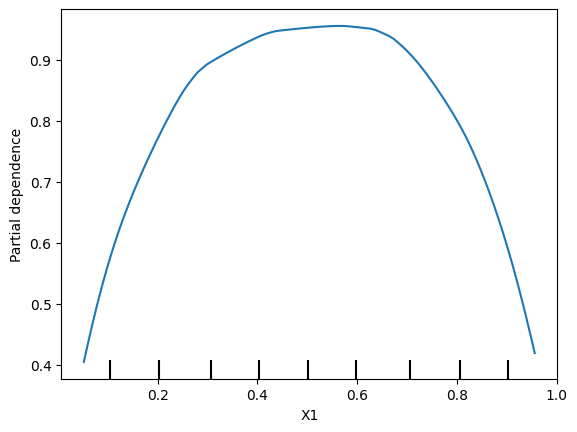

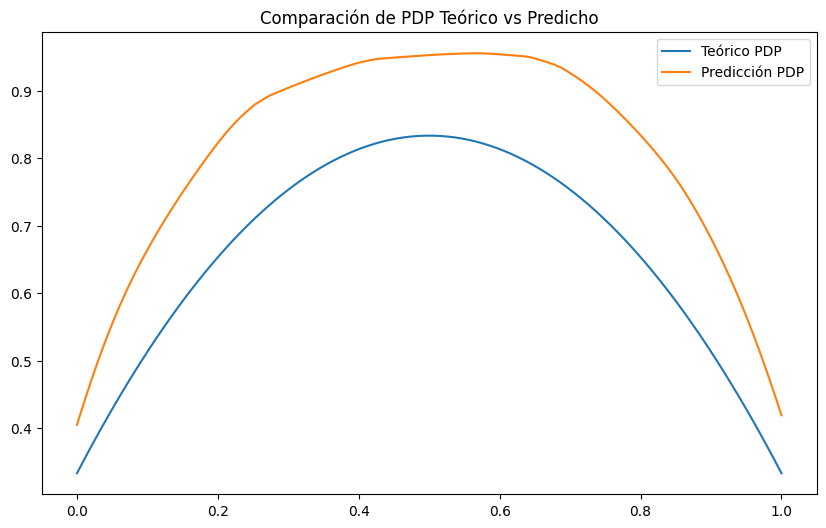

"\n# ALE\nplt.figure(figsize=(10, 6))\nplt.plot(xs, ale_theoretical, label='Teórico ALE')\nplt.plot(xs, ale_predicted, label='Predicción ALE')\nplt.legend()\nplt.title('Comparación de ALE Teórico vs Predicho')\nplt.show()\n"

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Función teórica para PDP y ALE
def theoretical_pdp_ale(xs, kind='pdp'):
    if kind == 'pdp':
        ys = -2*xs**2 + 2*xs + 1/3
    elif kind == 'ale':
        ys = -2*xs**2 + 2*xs - 1/4
    return ys

# Calcular los valores teóricos
xs = np.linspace(0, 1, 100)
pdp_theoretical = theoretical_pdp_ale(xs, kind='pdp')
ale_theoretical = theoretical_pdp_ale(xs, kind='ale')

# Calcular los valores predichos por el modelo para PDP
pdp_display = PartialDependenceDisplay.from_estimator(mlp_clf, X, [0], grid_resolution=100)
pdp_predicted = pdp_display.lines_[0][0].get_ydata()

# Calcular MSE para PDP
mse_pdp = mean_squared_error(pdp_theoretical, pdp_predicted)
print(f'MSE for PDP: {mse_pdp}')

# Calcular los valores predichos por el modelo para ALE
'''
ale_plot = ale_plot(mlp_clf, X, 'X1', monte_carlo=True)
ale_predicted = ale_plot.lines[0].get_ydata()

# Calcular MSE para ALE
mse_ale = mean_squared_error(ale_theoretical, ale_predicted)
print(f'MSE for ALE: {mse_ale}')
'''
# Visualizar y comparar gráficas

# PDP
plt.figure(figsize=(10, 6))
plt.plot(xs, pdp_theoretical, label='Teórico PDP')
plt.plot(xs, pdp_predicted, label='Predicción PDP')
plt.legend()
plt.title('Comparación de PDP Teórico vs Predicho')
plt.show()

'''
# ALE
plt.figure(figsize=(10, 6))
plt.plot(xs, ale_theoretical, label='Teórico ALE')
plt.plot(xs, ale_predicted, label='Predicción ALE')
plt.legend()
plt.title('Comparación de ALE Teórico vs Predicho')
plt.show()
'''

MSE for PDP: 0.0010027782715598017


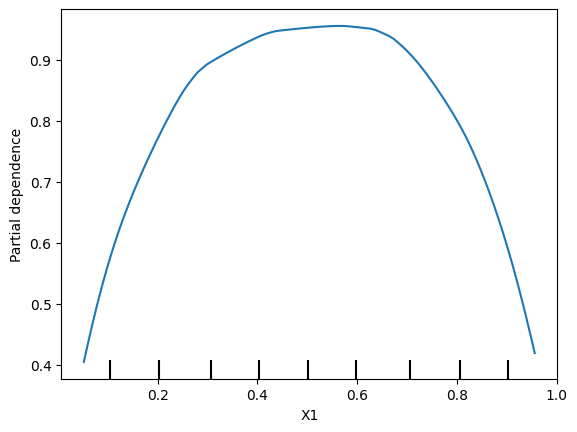

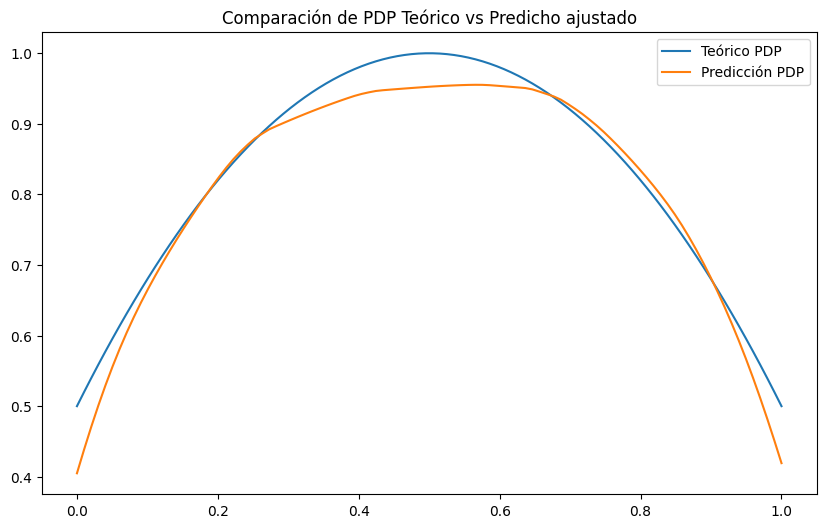

"\n# ALE\nplt.figure(figsize=(10, 6))\nplt.plot(xs, ale_theoretical, label='Teórico ALE')\nplt.plot(xs, ale_predicted, label='Predicción ALE')\nplt.legend()\nplt.title('Comparación de ALE Teórico vs Predicho')\nplt.show()\n"

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
import pandas as pd

# Función teórica para PDP y ALE
def theoretical_pdp_ale(xs, kind='pdp'):
    if kind == 'pdp':
        ys = -2*xs**2 + 2*xs + 1/2
    elif kind == 'ale':
        ys = -2*xs**2 + 2*xs - 1/4
    return ys

# Calcular los valores teóricos
xs = np.linspace(0, 1, 100)
pdp_theoretical = theoretical_pdp_ale(xs, kind='pdp')
ale_theoretical = theoretical_pdp_ale(xs, kind='ale')

# Calcular los valores predichos por el modelo para PDP
pdp_display = PartialDependenceDisplay.from_estimator(mlp_clf, X, [0], grid_resolution=100)
pdp_predicted = pdp_display.lines_[0][0].get_ydata()

# Calcular MSE para PDP
mse_pdp = mean_squared_error(pdp_theoretical, pdp_predicted)
print(f'MSE for PDP: {mse_pdp}')

# Calcular los valores predichos por el modelo para ALE
'''
ale_plot = ale_plot(mlp_clf, X, 'X1', monte_carlo=True)
ale_predicted = ale_plot.lines[0].get_ydata()

# Calcular MSE para ALE
mse_ale = mean_squared_error(ale_theoretical, ale_predicted)
print(f'MSE for ALE: {mse_ale}')
'''
# Visualizar y comparar gráficas

# PDP
plt.figure(figsize=(10, 6))
plt.plot(xs, pdp_theoretical, label='Teórico PDP')
plt.plot(xs, pdp_predicted, label='Predicción PDP')
plt.legend()
plt.title('Comparación de PDP Teórico vs Predicho ajustado')
plt.show()

'''
# ALE
plt.figure(figsize=(10, 6))
plt.plot(xs, ale_theoretical, label='Teórico ALE')
plt.plot(xs, ale_predicted, label='Predicción ALE')
plt.legend()
plt.title('Comparación de ALE Teórico vs Predicho')
plt.show()
'''

### ALE

In [79]:
#pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

In [80]:
from alepython import ale_plot
feature_list=['X1','X2']

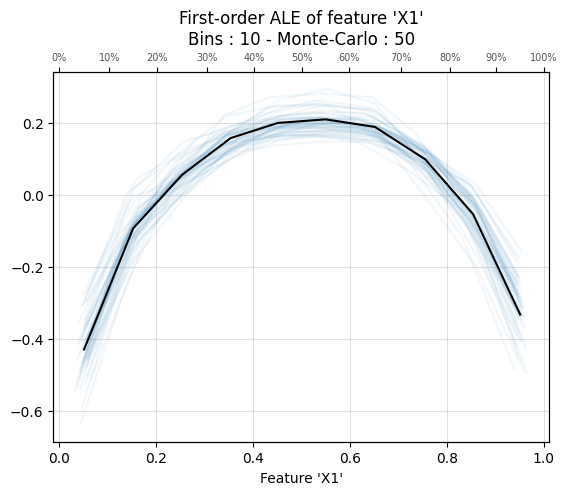

<Axes: title={'center': "First-order ALE of feature 'X1'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X1'">

In [81]:
ale_plot(mlp_clf, X, 'X1', monte_carlo=True)

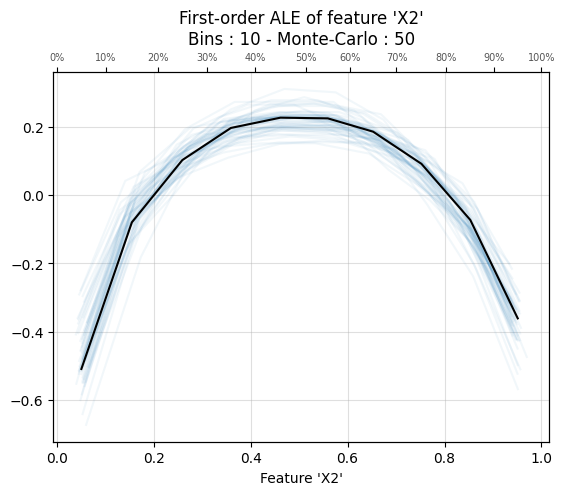

<Axes: title={'center': "First-order ALE of feature 'X2'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X2'">

In [82]:
ale_plot(mlp_clf, X, 'X2', monte_carlo=True)

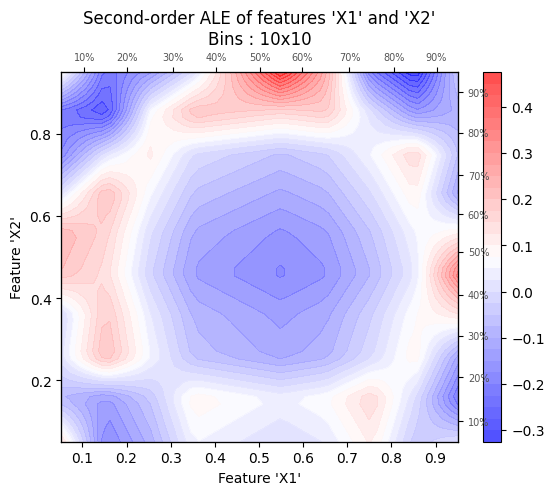

<Axes: title={'center': "Second-order ALE of features 'X1' and 'X2'\nBins : 10x10"}, xlabel="Feature 'X1'", ylabel="Feature 'X2'">

In [83]:
ale_plot(mlp_clf, X, ['X1','X2'], monte_carlo=True)

# Práctico con desviación típica 0,2

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sys
sys.path.append('../')
import Modelos

# Cargar los datos
nombre_archivo = "superficie_2.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros a optimizar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50,100), (50, 50, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.1]
}

# Inicializar el clasificador MLP
mlp = MLPClassifier(random_state=42, max_iter=1000)

mlp = Modelos.optimizar_modelo_clasificacion("NeuralNetwork", mlp, param_grid, X_train, y_train, X_test, y_test)


NeuralNetwork:
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Mejores hiperparámetros encontrados:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'sgd'}

Precisión del modelo en el conjunto de test: 0.813
Reporte de clasificación en el conjunto de test:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65       301
           1       0.83      0.92      0.87       699

    accuracy                           0.81      1000
   macro avg       0.79      0.74      0.76      1000
weighted avg       0.81      0.81      0.81      1000



In [85]:
mlp

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=6,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50), (50, 100),
                                                (50, 50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.01, 0.1],
                         'solver': ['sgd', 'adam']},
             verbose=1)

In [86]:
import pickle

pickle.dump(mlp, open('nt_superficie_2', 'wb'))

In [87]:
import pickle

mlp_clf = pickle.load(open('nt_superficie_2', 'rb'))

## Real

### PDP

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

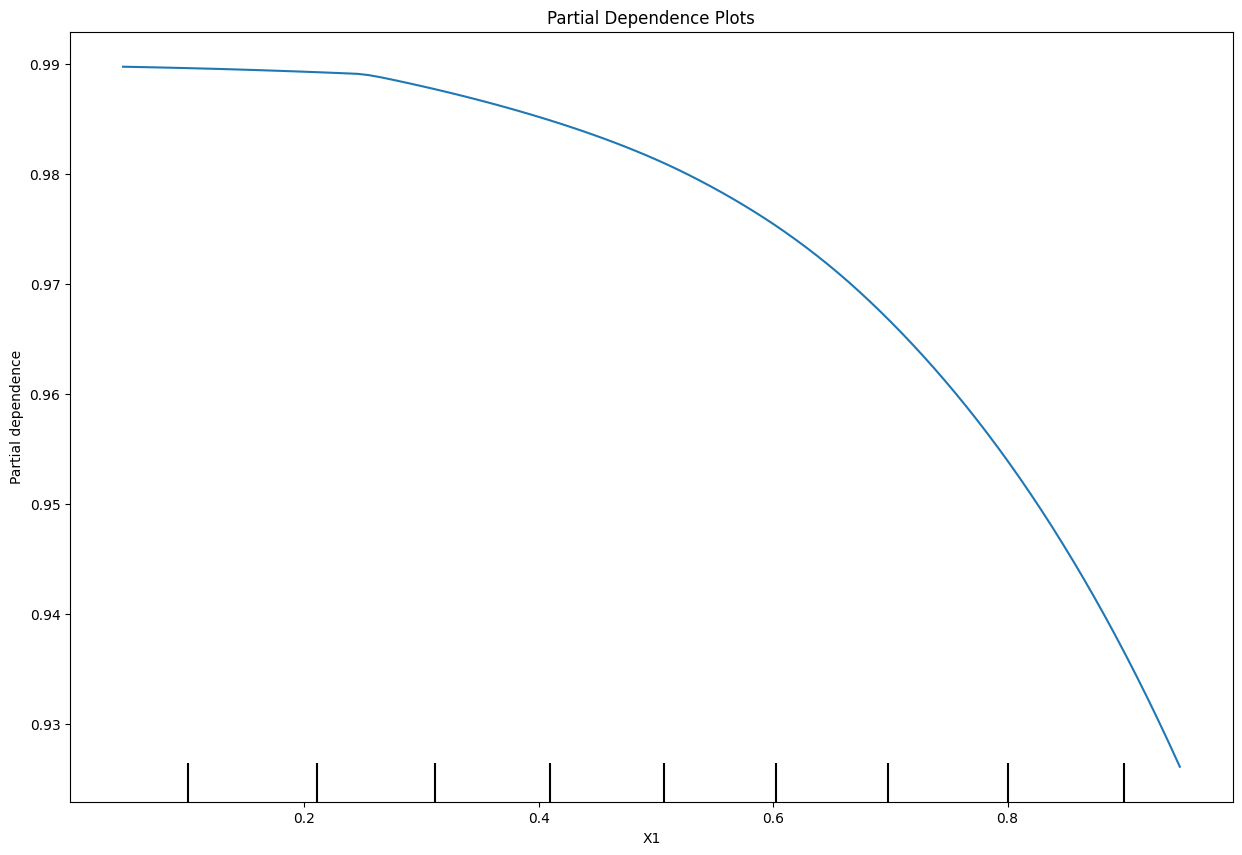

In [88]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[0], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

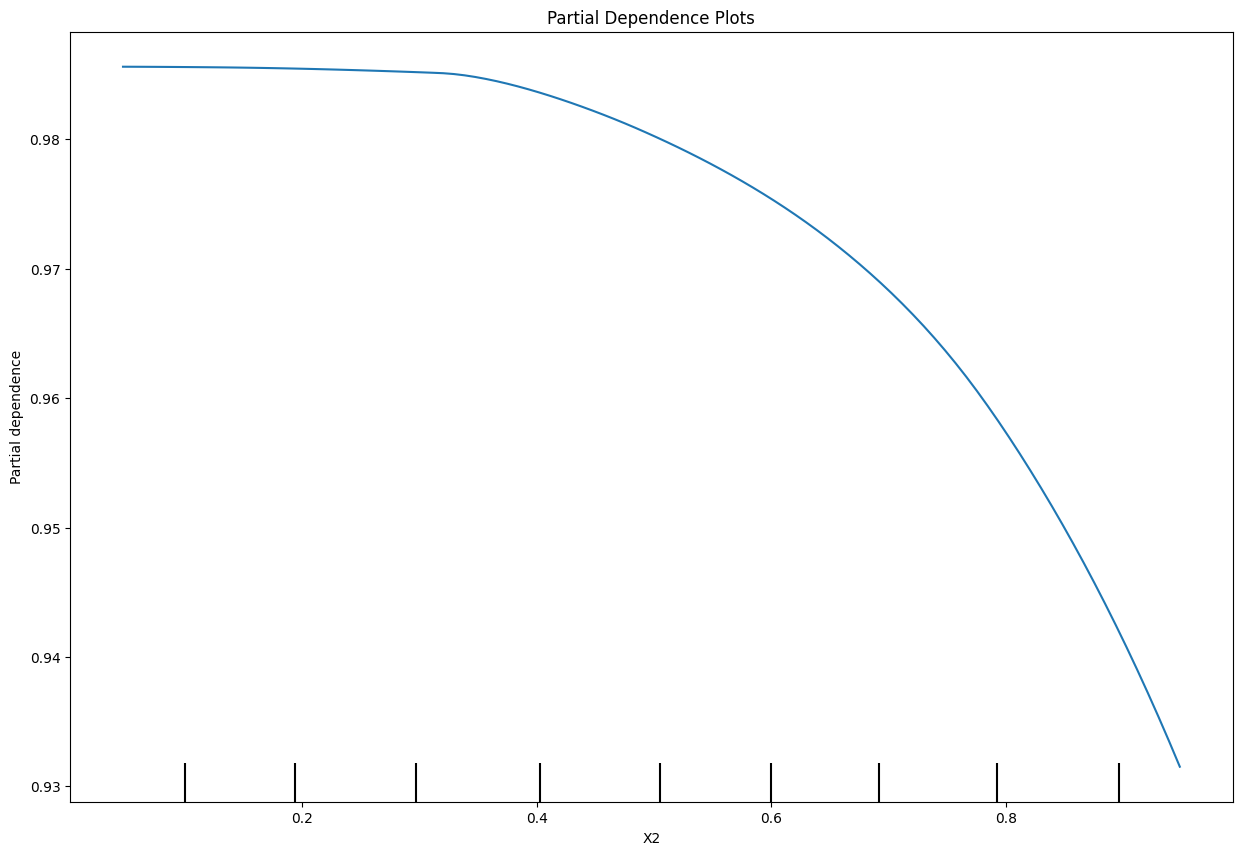

In [89]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[1], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

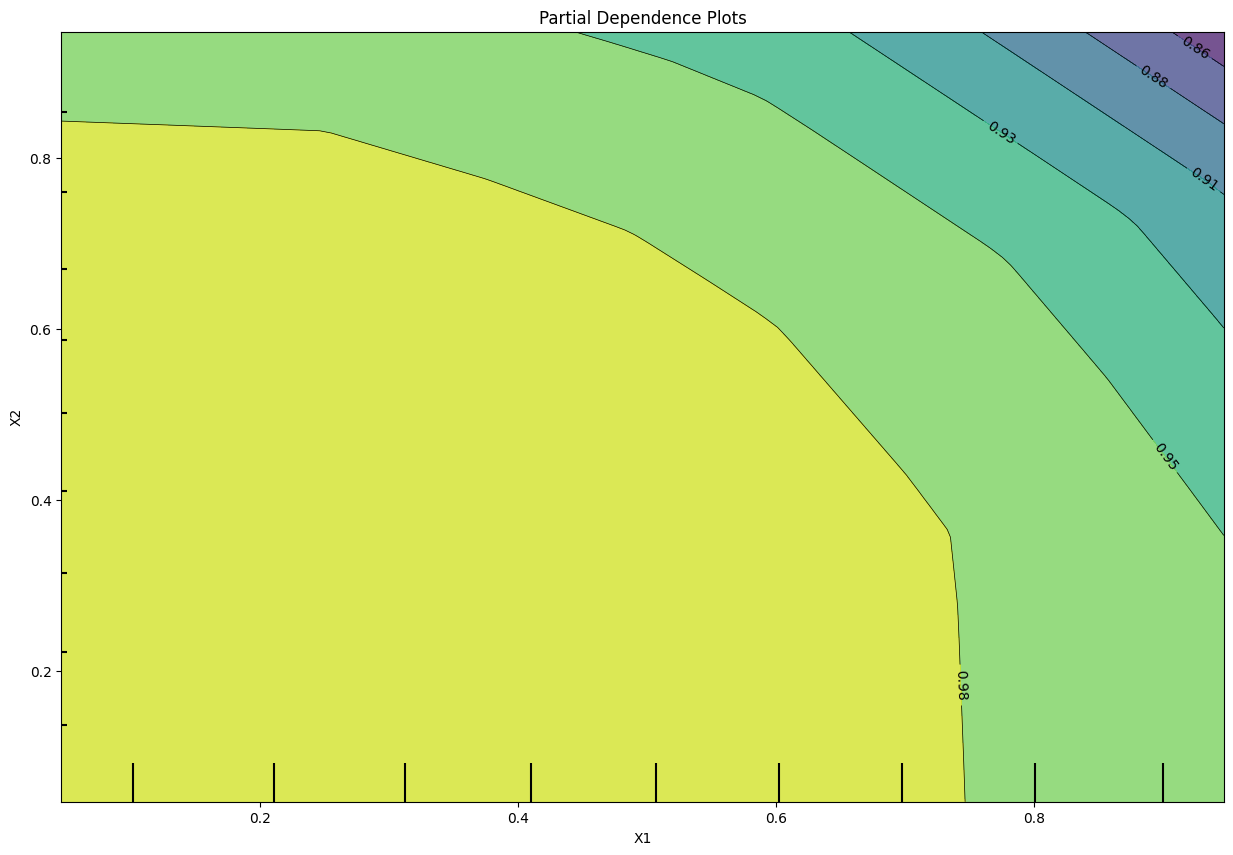

In [90]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[(0,1)], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

## ALE

In [91]:
from alepython import ale_plot
feature_list=['X1','X2']

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

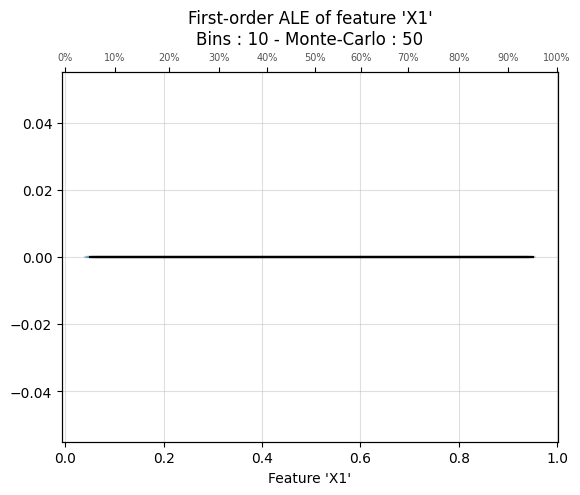

<Axes: title={'center': "First-order ALE of feature 'X1'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X1'">

In [92]:
ale_plot(mlp_clf, X, 'X1', monte_carlo=True)

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

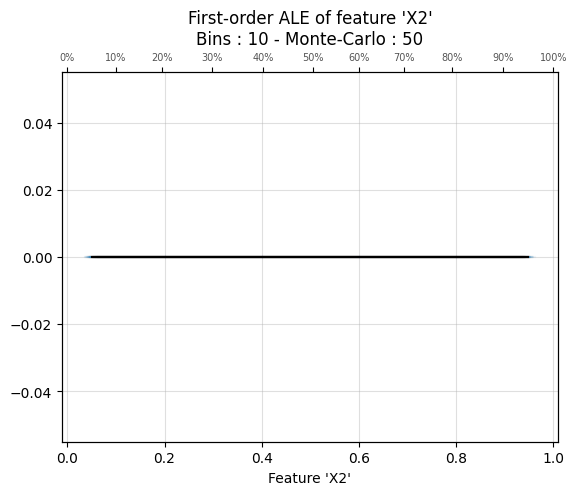

<Axes: title={'center': "First-order ALE of feature 'X2'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X2'">

In [93]:
ale_plot(mlp_clf, X, 'X2', monte_carlo=True)

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


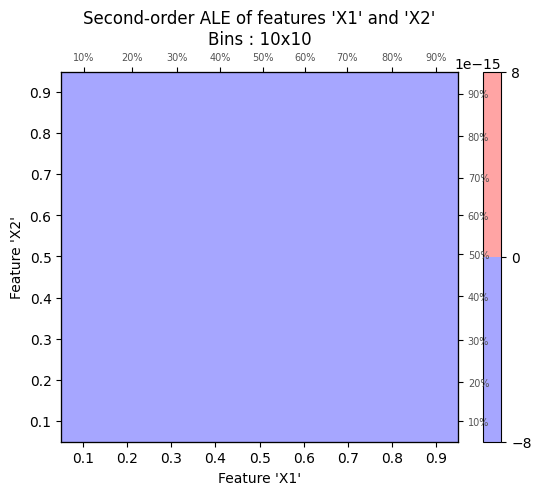

<Axes: title={'center': "Second-order ALE of features 'X1' and 'X2'\nBins : 10x10"}, xlabel="Feature 'X1'", ylabel="Feature 'X2'">

In [94]:
ale_plot(mlp_clf, X, ['X1','X2'], monte_carlo=True)

# Práctico con desviación típica 0,3

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sys
sys.path.append('../')
import Modelos

# Cargar los datos
nombre_archivo = "superficie_3.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros a optimizar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50,100), (50, 50, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.1]
}

# Inicializar el clasificador MLP
mlp = MLPClassifier(random_state=42, max_iter=1000)

mlp = Modelos.optimizar_modelo_clasificacion("NeuralNetwork", mlp, param_grid, X_train, y_train, X_test, y_test)


NeuralNetwork:
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Mejores hiperparámetros encontrados:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'sgd'}

Precisión del modelo en el conjunto de test: 0.749
Reporte de clasificación en el conjunto de test:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       303
           1       0.80      0.85      0.83       697

    accuracy                           0.75      1000
   macro avg       0.70      0.68      0.69      1000
weighted avg       0.74      0.75      0.74      1000



In [96]:
mlp

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=6,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50), (50, 100),
                                                (50, 50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.01, 0.1],
                         'solver': ['sgd', 'adam']},
             verbose=1)

In [97]:
import pickle

pickle.dump(mlp, open('nt_superficie_3', 'wb'))

In [98]:
import pickle

mlp_clf = pickle.load(open('nt_superficie_3', 'rb'))

## Real

### PDP

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

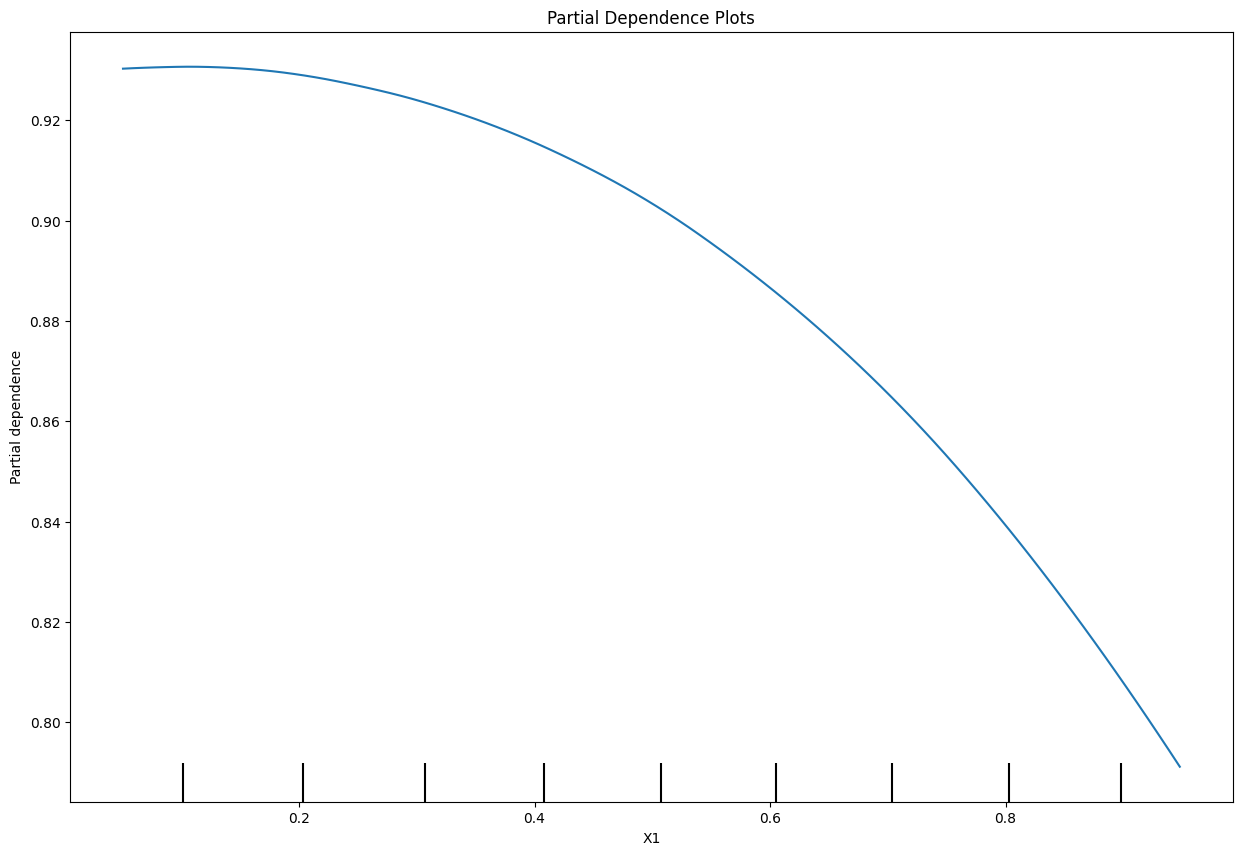

In [99]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[0], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

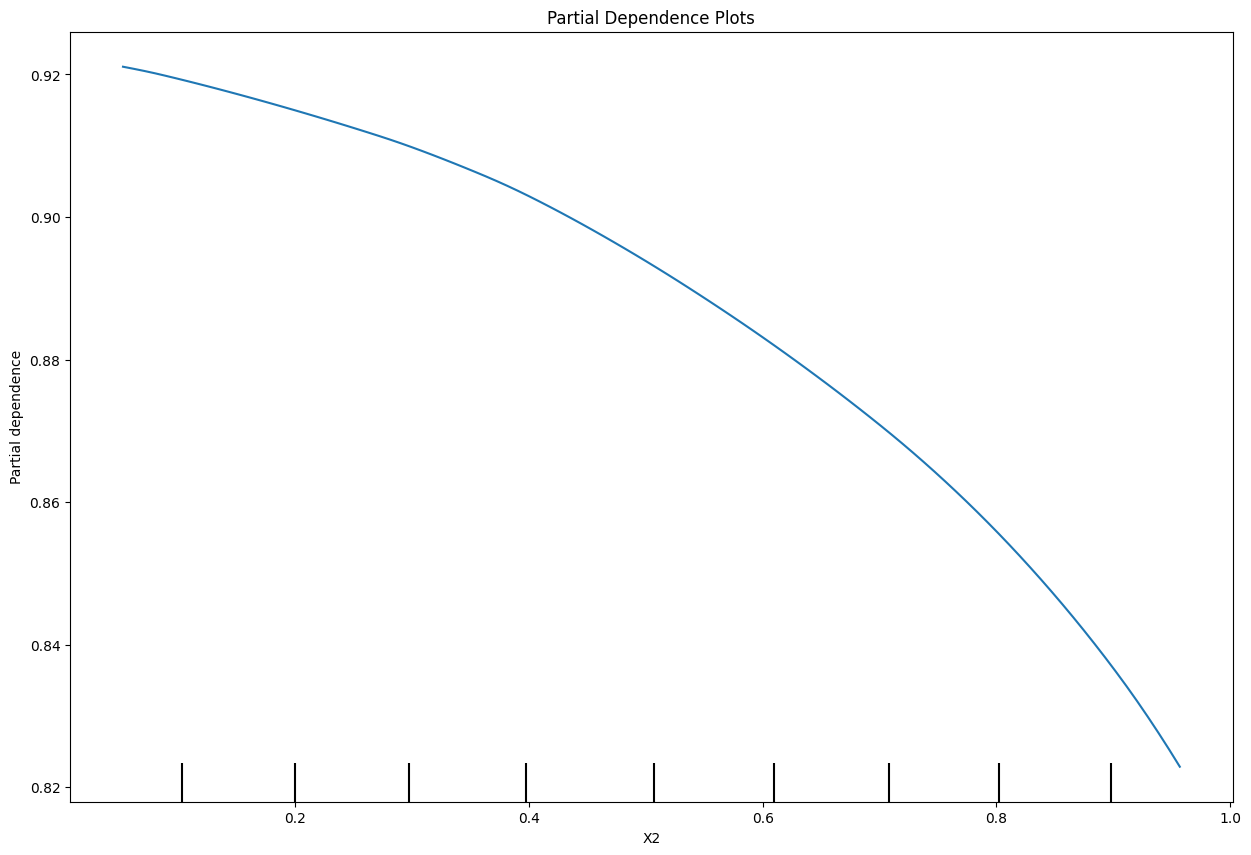

In [100]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[1], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

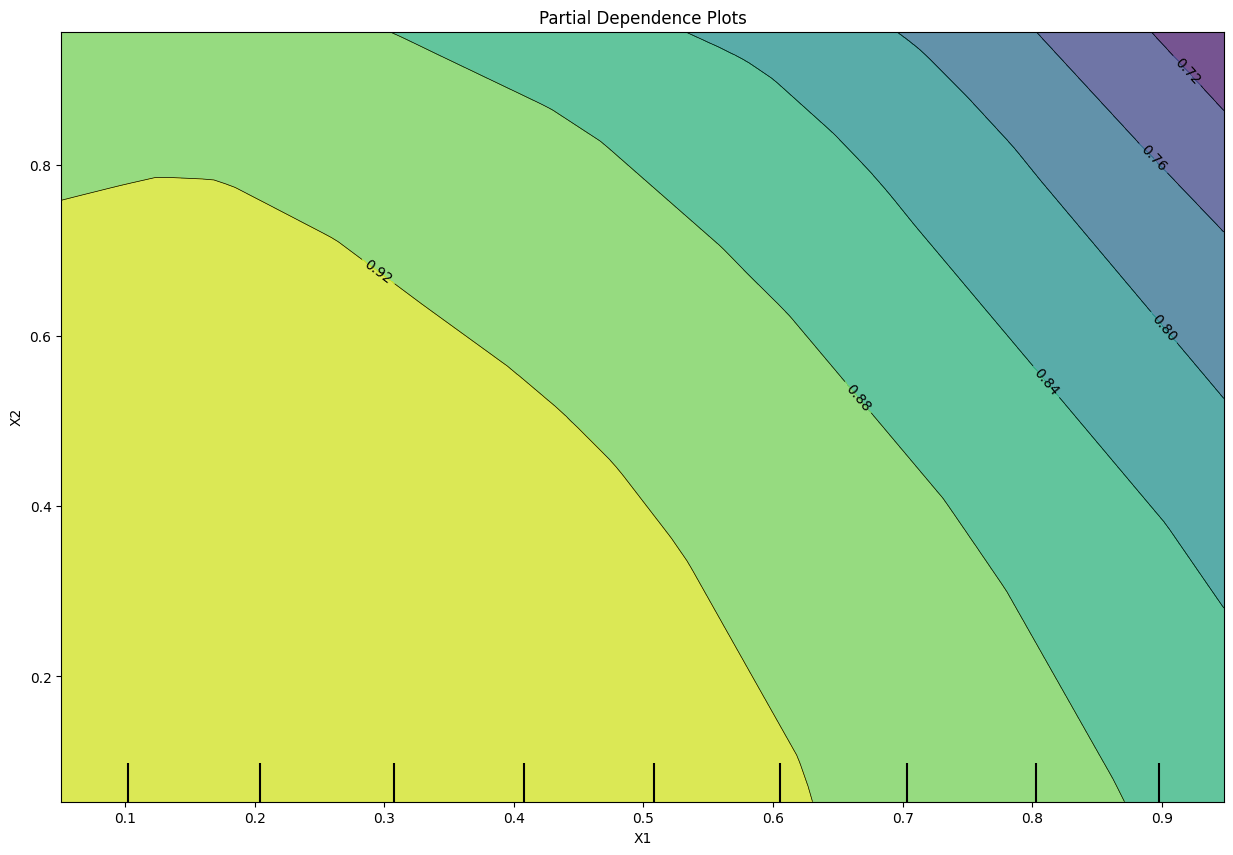

In [101]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_clf,
    X=X,
    features=[(0,1)], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

## ALE

In [102]:
from alepython import ale_plot
feature_list=['X1','X2']

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

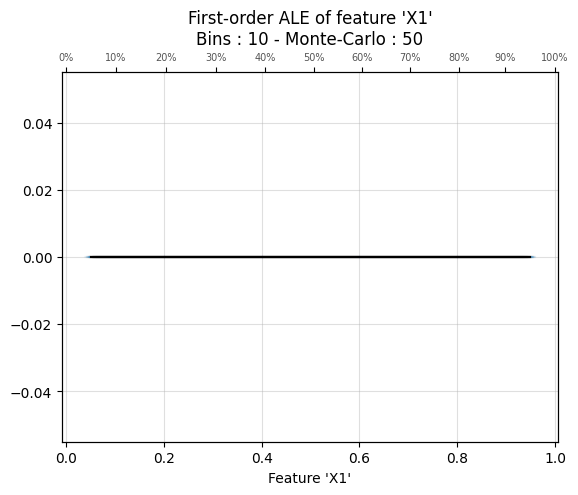

<Axes: title={'center': "First-order ALE of feature 'X1'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X1'">

In [103]:
ale_plot(mlp_clf, X, 'X1', monte_carlo=True)

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

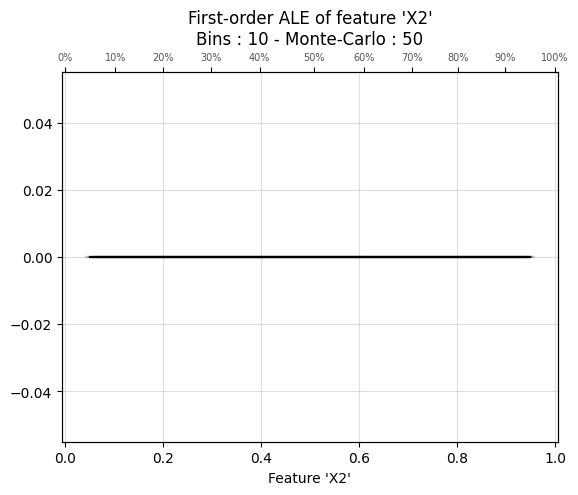

<Axes: title={'center': "First-order ALE of feature 'X2'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X2'">

In [104]:
ale_plot(mlp_clf, X, 'X2', monte_carlo=True)

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


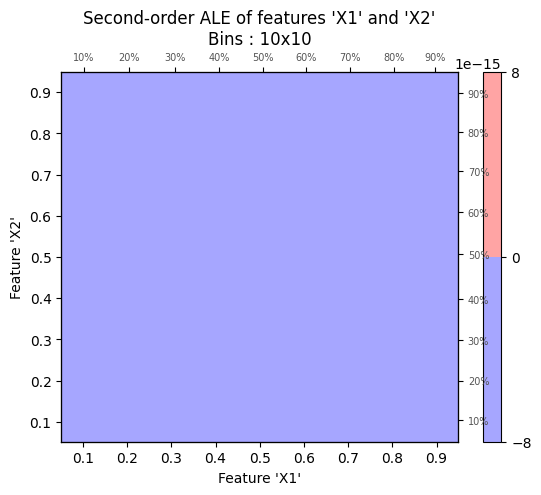

<Axes: title={'center': "Second-order ALE of features 'X1' and 'X2'\nBins : 10x10"}, xlabel="Feature 'X1'", ylabel="Feature 'X2'">

In [105]:
ale_plot(mlp_clf, X, ['X1','X2'], monte_carlo=True)

# ANEXO: Regresión

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import sys
sys.path.append('../')
import Modelos

# Cargar los datos
nombre_archivo = "superficie_rg.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros a optimizar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50,100), (50, 50, 50)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.1]
}

# Inicializar el regresor MLP
mlp = MLPRegressor(random_state=42, max_iter=1000)

# Optimizar el modelo de regresión
mlp = Modelos.optimizar_modelo_regresion("NeuralNetwork", mlp, param_grid, X_train, y_train, X_test, y_test)



NeuralNetwork:
Fitting 5 folds for each of 192 candidates, totalling 960 fits


KeyboardInterrupt: 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import sys
sys.path.append('../')
import Modelos

# Cargar los datos
nombre_archivo = "superficie_rg.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_rg = MLPRegressor(activation='relu',
        alpha=0.01,
        hidden_layer_sizes=(50,50,50),
        learning_rate='adaptive',
        learning_rate_init=0.01,
        solver='sgd',
        max_iter=1000)
mlp_rg.fit(X_train, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(50, 50, 50),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000,
             solver='sgd')

In [6]:
import pickle

pickle.dump(mlp_rg, open('nt_superficie_rg', 'wb'))

In [7]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar los datos
nombre_archivo = "superficie_rg.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mlp_rg = pickle.load(open('nt_superficie_rg', 'rb'))

## Real

### PDP

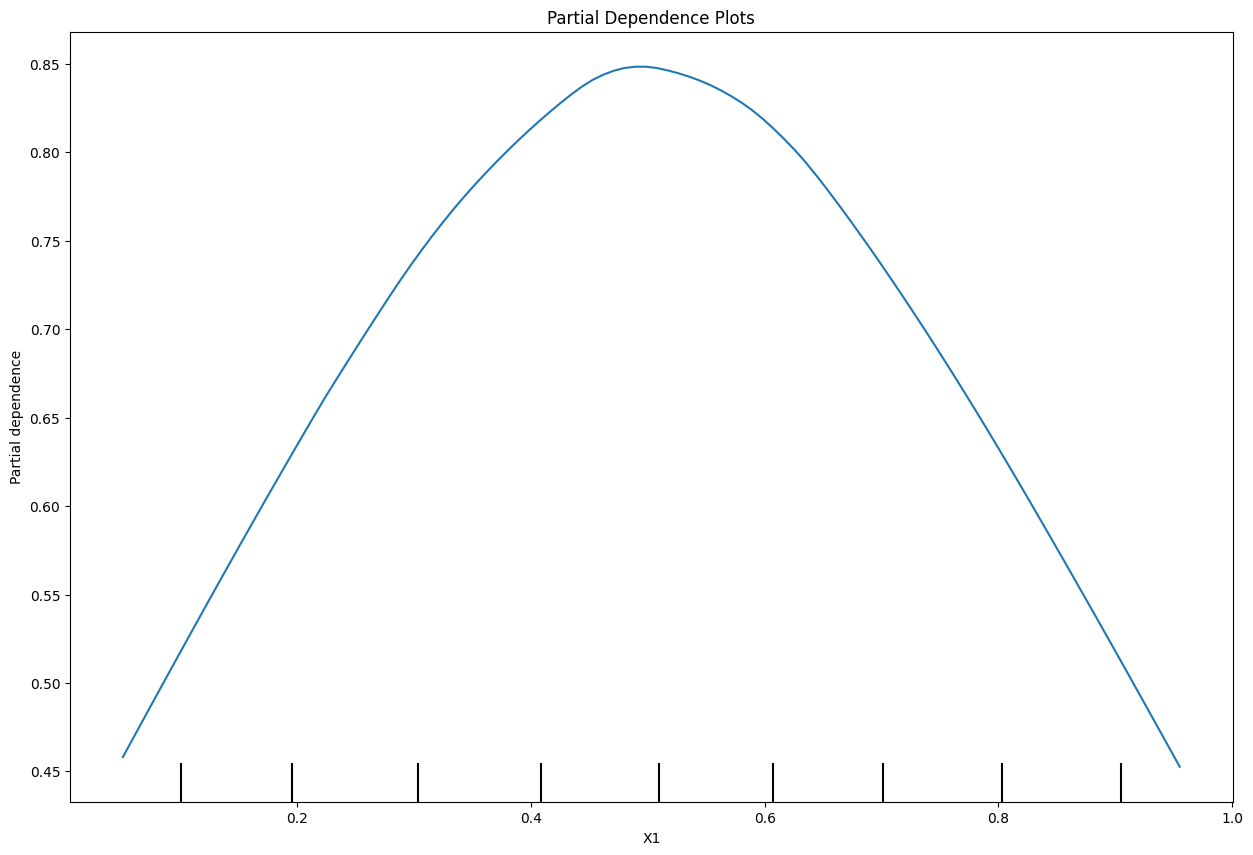

In [8]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_rg,
    X=X,
    features=[0], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

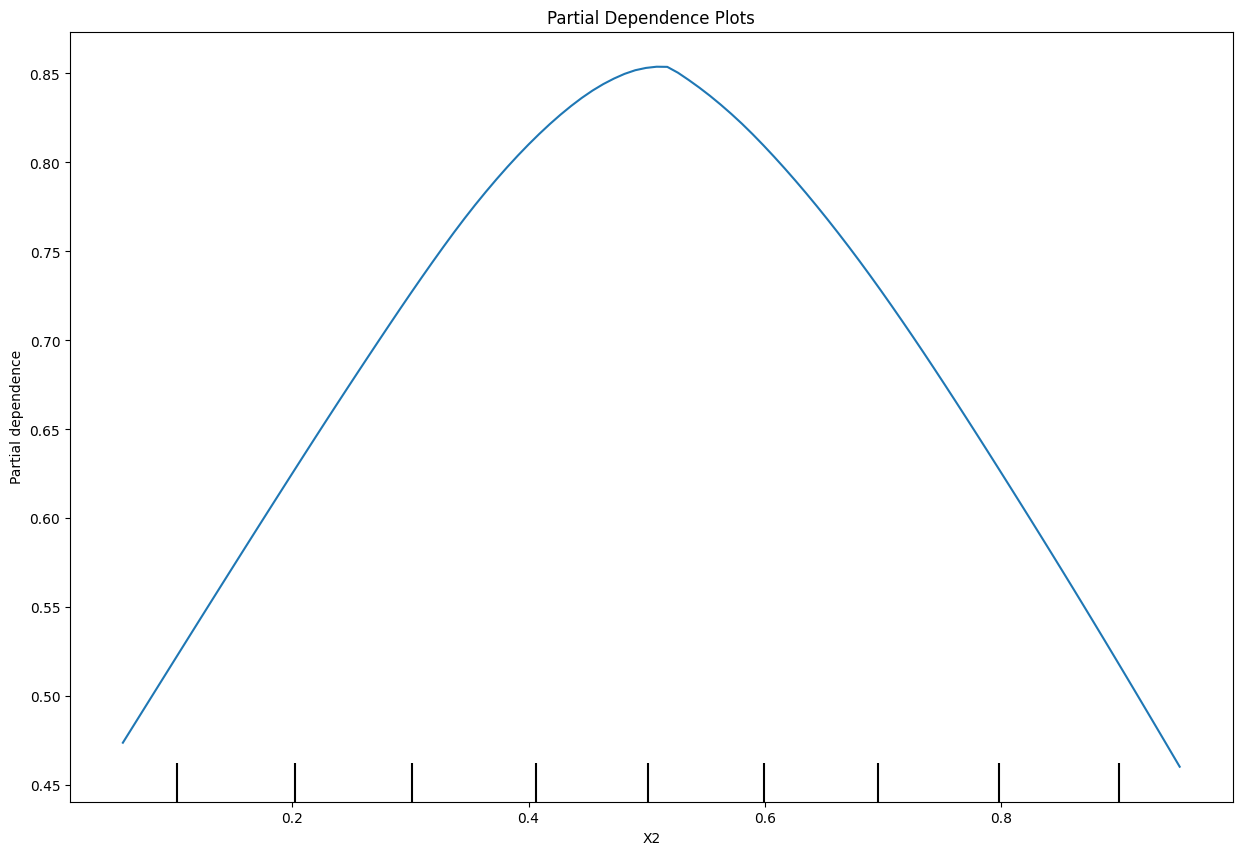

In [9]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_rg,
    X=X,
    features=[1], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

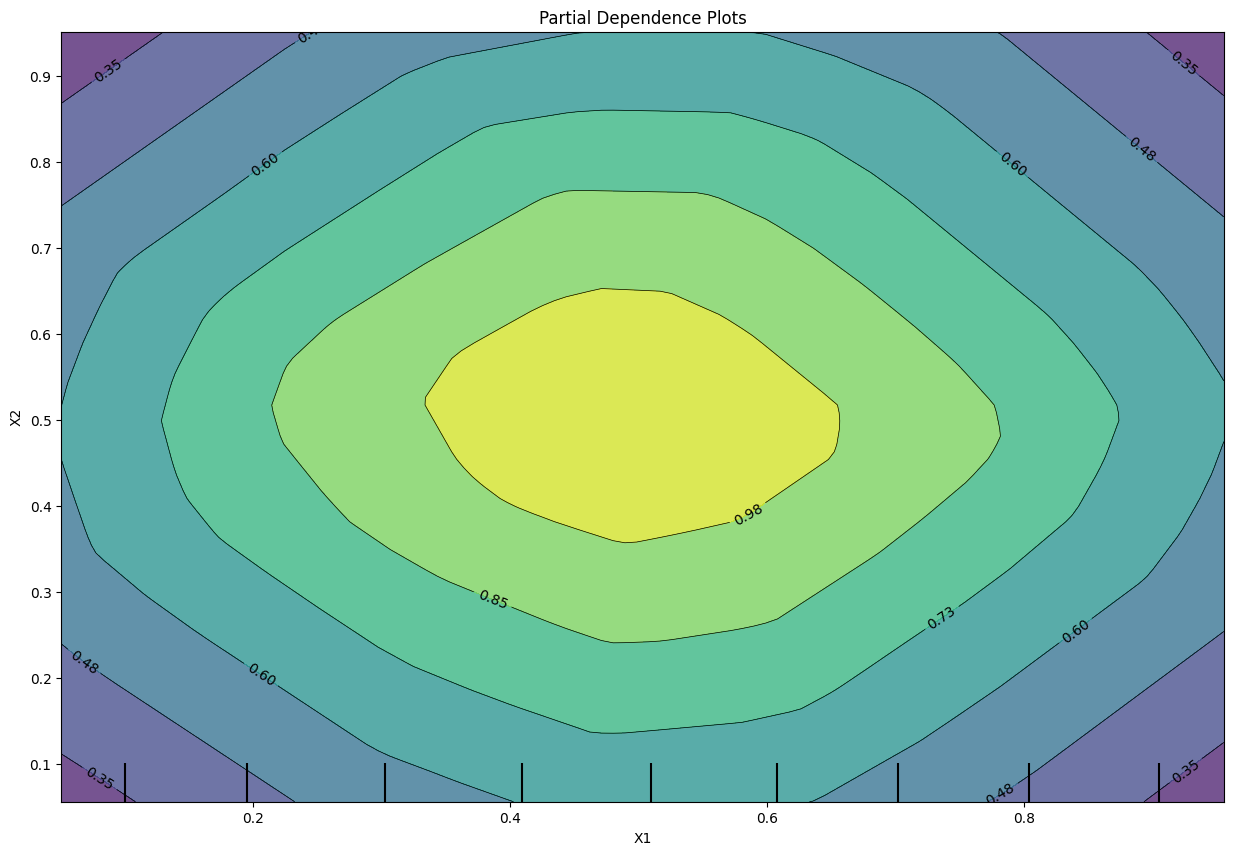

In [10]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=mlp_rg,
    X=X,
    features=[(0,1)], # the features to plot
    random_state=5,
    ax=ax,
)
plt.show()

### ALE

In [17]:
#pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

In [18]:
from alepython import ale_plot
feature_list=['X1','X2']

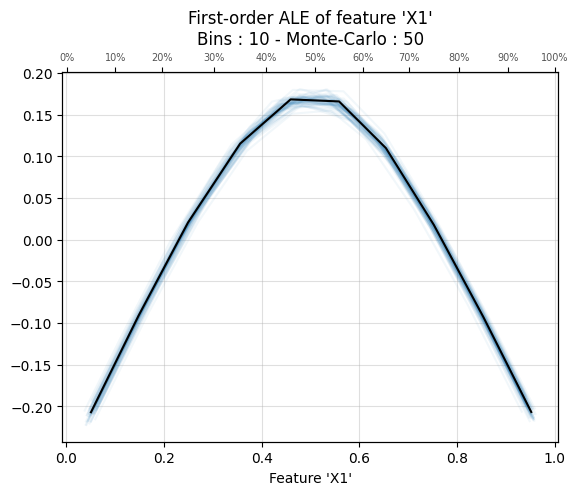

<Axes: title={'center': "First-order ALE of feature 'X1'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X1'">

In [19]:
ale_plot(mlp_rg, X, 'X1', monte_carlo=True)

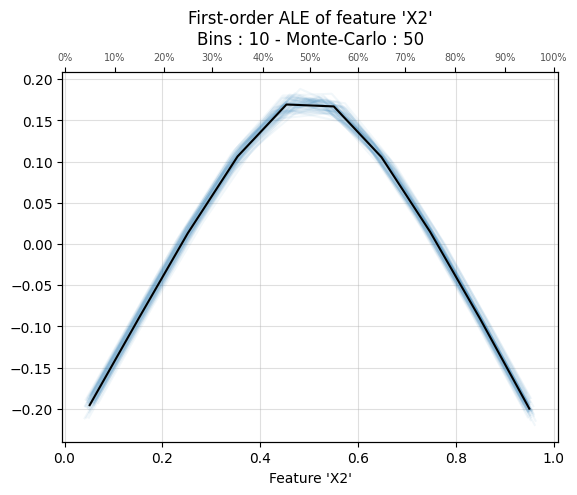

<Axes: title={'center': "First-order ALE of feature 'X2'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'X2'">

In [20]:
ale_plot(mlp_rg, X, 'X2', monte_carlo=True)

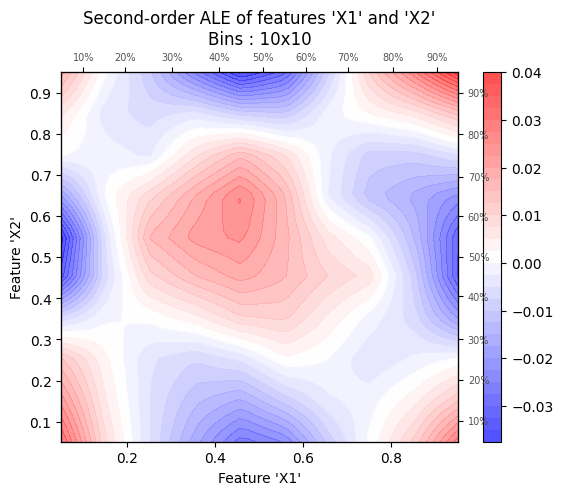

<Axes: title={'center': "Second-order ALE of features 'X1' and 'X2'\nBins : 10x10"}, xlabel="Feature 'X1'", ylabel="Feature 'X2'">

In [21]:
ale_plot(mlp_rg, X, ['X1','X2'], monte_carlo=True)

## Comparación

MSE for PDP: 0.0018240328036249458


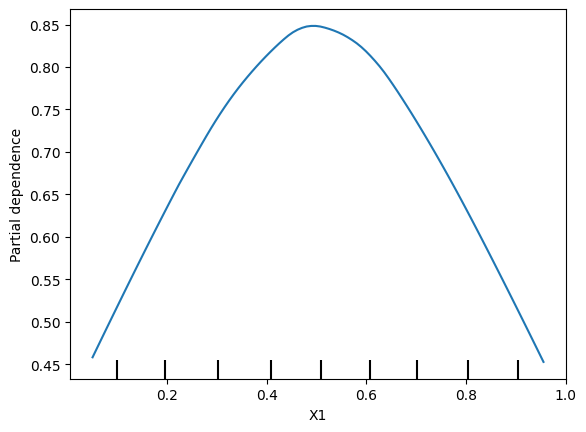

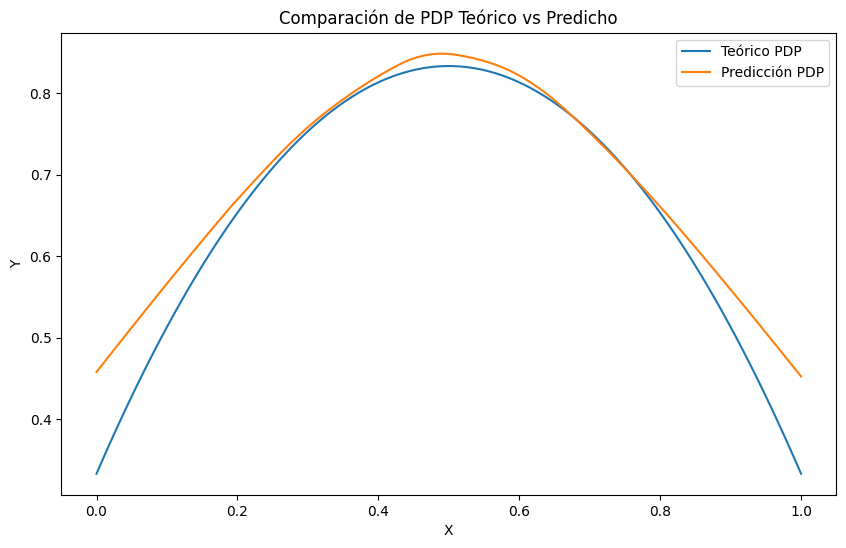

In [23]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
nombre_archivo = "superficie_rg.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el modelo
mlp_rg = pickle.load(open('nt_superficie_rg', 'rb'))

# Función teórica para PDP
def theoretical_pdp_ale(xs, kind='pdp'):
    if kind == 'pdp':
        ys = -2 * xs**2 + 2 * xs + 1/3
    elif kind == 'ale':
        ys = -2 * xs**2 + 2 * xs - 1/4
    return ys

# Calcular los valores teóricos
xs = np.linspace(0, 1, 100)
pdp_theoretical = theoretical_pdp_ale(xs, kind='pdp')

# Calcular los valores predichos por el modelo para PDP
pdp_display = PartialDependenceDisplay.from_estimator(mlp_rg, X, [0], grid_resolution=100)
pdp_predicted = pdp_display.lines_[0][0].get_ydata()

# Calcular MSE para PDP
mse_pdp = mean_squared_error(pdp_theoretical, pdp_predicted)
print(f'MSE for PDP: {mse_pdp}')

# Visualizar y comparar gráficas

# PDP
plt.figure(figsize=(10, 6))
plt.plot(xs, pdp_theoretical, label='Teórico PDP')
plt.plot(xs, pdp_predicted, label='Predicción PDP')
plt.legend()
plt.title('Comparación de PDP Teórico vs Predicho')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names


MSE for ALE: 0.007308896594081433


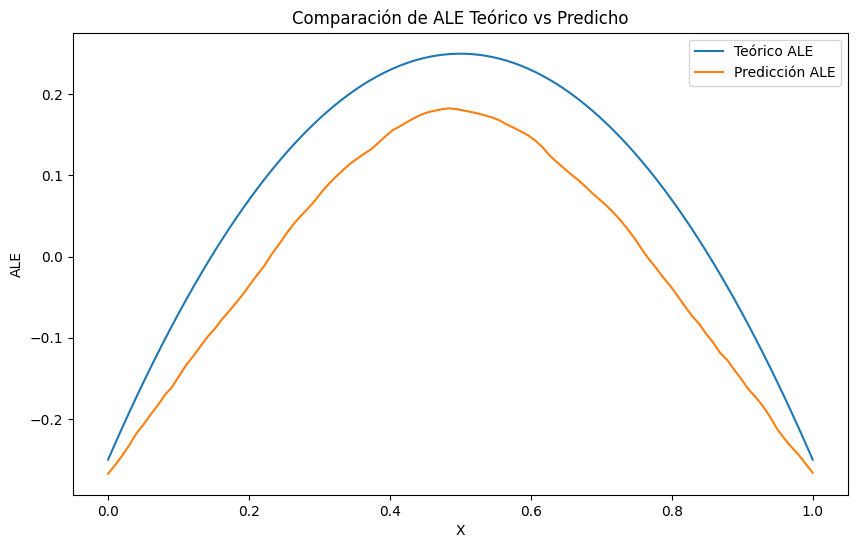

In [24]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from alibi.explainers import ALE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Cargar los datos
nombre_archivo = "superficie_rg.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el modelo
mlp_rg = pickle.load(open('nt_superficie_rg', 'rb'))

# Función teórica para PDP y ALE
def theoretical_pdp_ale(xs, kind='pdp'):
    if kind == 'pdp':
        ys = -2 * xs**2 + 2 * xs + 1/3
    elif kind == 'ale':
        ys = -2 * xs**2 + 2 * xs - 1/4
    return ys

# Calcular los valores teóricos
xs = np.linspace(0, 1, 100)
ale_theoretical = theoretical_pdp_ale(xs, kind='ale')

# Calcular ALE usando alibi
ale_explainer = ALE(mlp_rg.predict, feature_names=X.columns.tolist())
ale_exp = ale_explainer.explain(X.values)

# Aplanar ale_values si es necesario
if ale_values.ndim > 1:
    ale_values = ale_values.flatten()

# Interpolar ALE predicho para coincidir con los valores teóricos
ale_predicted = np.interp(xs, np.linspace(0, 1, len(ale_values)), ale_values)

# Calcular MSE para ALE
mse_ale = mean_squared_error(ale_theoretical, ale_predicted)
print(f'MSE for ALE: {mse_ale}')

# Visualizar y comparar gráficas

# ALE
plt.figure(figsize=(10, 6))
plt.plot(xs, ale_theoretical, label='Teórico ALE')
plt.plot(xs, ale_predicted, label='Predicción ALE')
plt.legend()
plt.title('Comparación de ALE Teórico vs Predicho')
plt.xlabel('X')
plt.ylabel('ALE')
plt.show()

X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names
X does not have valid feature names, but MLPRegressor was fitted with feature names


MSE for ALE: 0.007308896594081433


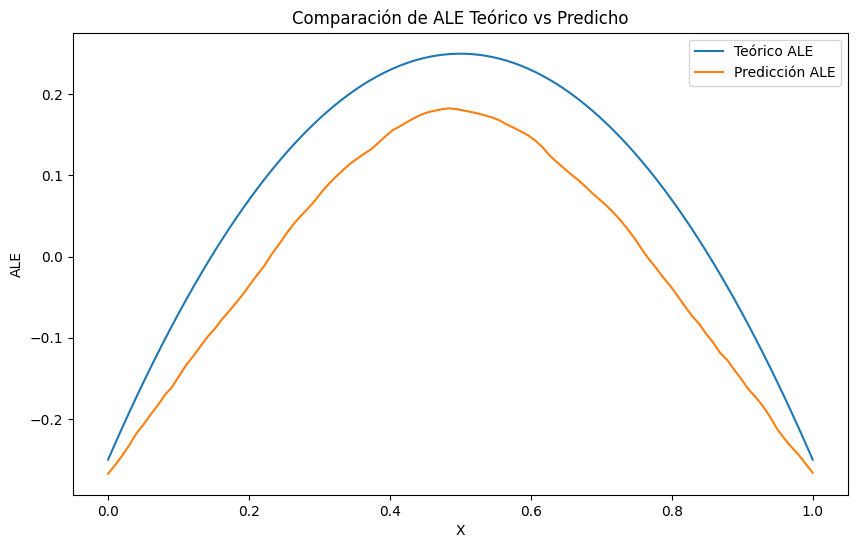

In [27]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from alibi.explainers import ALE

# Cargar los datos
nombre_archivo = "superficie_rg.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el modelo
mlp_rg = pickle.load(open('nt_superficie_rg', 'rb'))

# Función teórica para PDP y ALE
def theoretical_pdp_ale(xs, kind='pdp'):
    if kind == 'pdp':
        ys = -2 * xs**2 + 2 * xs + 1/3
    elif kind == 'ale':
        ys = -2 * xs**2 + 2 * xs - 1/4
    return ys

# Calcular los valores teóricos
xs = np.linspace(0, 1, 100)
ale_theoretical = theoretical_pdp_ale(xs, kind='ale')

# Calcular ALE usando alibi
ale_explainer = ALE(mlp_rg.predict, feature_names=X.columns.tolist())
ale_exp = ale_explainer.explain(X.values)

# Extraer valores ALE para la primera característica y aplanar si es necesario
ale_values = ale_exp.ale_values[0].flatten()

# Interpolar ALE predicho para coincidir con los valores teóricos
ale_predicted = np.interp(xs, np.linspace(0, 1, len(ale_values)), ale_values)

# Calcular MSE para ALE
mse_ale = mean_squared_error(ale_theoretical, ale_predicted)
print(f'MSE for ALE: {mse_ale}')

# Visualizar y comparar gráficas

# ALE
plt.figure(figsize=(10, 6))
plt.plot(xs, ale_theoretical, label='Teórico ALE')
plt.plot(xs, ale_predicted, label='Predicción ALE')
plt.legend()
plt.title('Comparación de ALE Teórico vs Predicho')
plt.xlabel('X')
plt.ylabel('ALE')
plt.show()

# DESCARTADO

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Cargar los datos
nombre_archivo = "seno.csv"
datos_leidos = pd.read_csv(nombre_archivo)

# Dividir los datos en características (X) y etiquetas (y)
X = datos_leidos.drop('Y', axis=1)  # Características
y = datos_leidos['Y']  # Etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
modelo = Sequential()
modelo.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta con 128 neuronas y función de activación ReLU
modelo.add(Dense(64, activation='relu'))  # Capa oculta con 64 neuronas y función de activación ReLU
modelo.add(Dense(1, activation='sigmoid'))  # Capa de salida con 1 neurona y función de activación sigmoide

# Compilar el modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
puntuacion = modelo.evaluate(X_test, y_test)
print("Precisión del modelo: %.2f%%" % (puntuacion[1] * 100))

nt_clf = modelo

Epoch 1/20
125/125 [==============================] - 1s 3ms/step - loss: 0.6399 - accuracy: 0.6695 - val_loss: 0.6311 - val_accuracy: 0.6710
Epoch 2/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6322 - accuracy: 0.6693 - val_loss: 0.6286 - val_accuracy: 0.6700
Epoch 3/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6815 - val_loss: 0.6223 - val_accuracy: 0.6910
Epoch 4/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.7023 - val_loss: 0.6187 - val_accuracy: 0.6910
Epoch 5/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7080 - val_loss: 0.6150 - val_accuracy: 0.7030
Epoch 6/20
125/125 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7082 - val_loss: 0.6154 - val_accuracy: 0.7000
Epoch 7/20
125/125 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7082 - val_loss: 0.6050 - val_accuracy: 0.7050
Epoch 